In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")

**This model will combine both binary data and pictures with concatinated deep learning architecture.**

In [2]:
chances=pd.read_excel('Chances.xlsm')

chances.head()

Header  Controlled Ball  Pressured  Area  Side  Good chance  Penalty  Goal
0       0                1          0     0     0            0        0     0
1       0                1          1     1     1            0        0     0
2       1                0          0     1     0            0        0     0
3       0                1          1     0     1            0        0     0
4       1                0          0     1     1            0        0     0

In [3]:
# Loading images

images = []
labels = []

for i in range(1, 107):
    img_path = f"Gole/{i}.png"
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img) / 255.0
    images.append(img)
    labels.append(chances.at[i-1, 'Goal'])

images = np.array(images)
labels = np.array(labels)

In [4]:
images[0][0]

array([[0.48627451, 0.14509804, 0.17254902, 1.        ],
       [0.47058824, 0.1254902 , 0.17254902, 1.        ],
       [0.58039216, 0.28627451, 0.36078431, 1.        ],
       [0.69019608, 0.47843137, 0.56470588, 1.        ],
       [0.7372549 , 0.6       , 0.69411765, 1.        ],
       [0.71372549, 0.59607843, 0.69411765, 1.        ],
       [0.65490196, 0.54117647, 0.60392157, 1.        ],
       [0.95294118, 0.85882353, 0.89019608, 1.        ],
       [0.50196078, 0.32156863, 0.36078431, 1.        ],
       [0.2       , 0.01960784, 0.04705882, 1.        ],
       [0.19607843, 0.01176471, 0.04705882, 1.        ],
       [0.20784314, 0.02745098, 0.09019608, 1.        ],
       [0.27058824, 0.11764706, 0.18431373, 1.        ],
       [0.22352941, 0.09019608, 0.16470588, 1.        ],
       [0.10196078, 0.        , 0.0627451 , 1.        ],
       [0.14117647, 0.05098039, 0.10980392, 1.        ],
       [0.38431373, 0.28235294, 0.34901961, 1.        ],
       [0.40784314, 0.31372549,

In [5]:
chances=chances.iloc[:,:-1]

In [6]:
chances

Header  Controlled Ball  Pressured  Area  Side  Good chance  Penalty
0         0                1          0     0     0            0        0
1         0                1          1     1     1            0        0
2         1                0          0     1     0            0        0
3         0                1          1     0     1            0        0
4         1                0          0     1     1            0        0
..      ...              ...        ...   ...   ...          ...      ...
101       0                1          1     1     1            0        0
102       0                0          0     1     0            1        0
103       0                1          0     0     0            0        0
104       0                0          0     1     0            1        0
105       0                1          1     0     0            0        0

[106 rows x 7 columns]

In [7]:
tf.random.set_seed(42)

In [8]:
# Defining the Sequential model for image data
image_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 4)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu')
])

# Defining the input for numeric data
numeric_input = layers.Input(shape=(chances.shape[1],), name='numeric_input')

# Passing the image data through the image_model
image_output = image_model.output

# Concatenating image and numeric outputs
concatenated = layers.concatenate([image_output, numeric_input])

dense1 = layers.Dense(16, activation='relu')(concatenated)
output = layers.Dense(1, activation='sigmoid')(dense1)

model = models.Model(inputs=[image_model.input, numeric_input], outputs=output)

In [9]:
# Learning parameters and compiling

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=2000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Data splitting

X_image_train, X_image_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(images, chances, labels, test_size=0.15, random_state=42)

In [11]:
X_image_train, X_image_val, X_numeric_train, X_numeric_val, y_train, y_val = train_test_split(X_image_train, X_numeric_train, y_train, test_size=0.15, random_state=42)

In [12]:
model.fit([X_image_train, X_numeric_train], y_train, epochs=10, batch_size=30, validation_data=([X_image_val, X_numeric_val], y_val))

Epoch 1/10


3/3 [==============================] - 7s 1s/step - loss: 1.0474 - accuracy: 0.5132 - val_loss: 0.8537 - val_accuracy: 0.4286
Epoch 2/10
3/3 [==============================] - 2s 800ms/step - loss: 0.6727 - accuracy: 0.5789 - val_loss: 0.7033 - val_accuracy: 0.5714
Epoch 3/10
3/3 [==============================] - 2s 710ms/step - loss: 0.6255 - accuracy: 0.6184 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 2s 718ms/step - loss: 0.6361 - accuracy: 0.6711 - val_loss: 0.7303 - val_accuracy: 0.5714
Epoch 5/10
3/3 [==============================] - 2s 694ms/step - loss: 0.6363 - accuracy: 0.6184 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 2s 704ms/step - loss: 0.6059 - accuracy: 0.6974 - val_loss: 0.7351 - val_accuracy: 0.4286
Epoch 7/10
3/3 [==============================] - 2s 696ms/step - loss: 0.6150 - accuracy: 0.6974 - val_loss: 0.7561 - val_accuracy: 0.5000
Epoch 8/10
3/3 [=====

In [13]:
test_loss, test_acc = model.evaluate([X_image_test, X_numeric_test], y_test, verbose=1)
print(f"Test accuracy: {test_acc}")

1/1 [==============================] - 0s 259ms/step - loss: 0.5531 - accuracy: 0.7500
Test accuracy: 0.75


In [14]:
y_pred_prob = model.predict([X_image_test, X_numeric_test])

1/1 [==============================] - 1s 542ms/step


In [15]:
y_pred_prob

array([[0.23042376],
       [0.19518563],
       [0.4319761 ],
       [0.2578485 ],
       [0.4864637 ],
       [0.3632273 ],
       [0.20195045],
       [0.1360208 ],
       [0.24604207],
       [0.3762984 ],
       [0.3280071 ],
       [0.4833762 ],
       [0.25333083],
       [0.24027947],
       [0.19928831],
       [0.20575982]], dtype=float32)

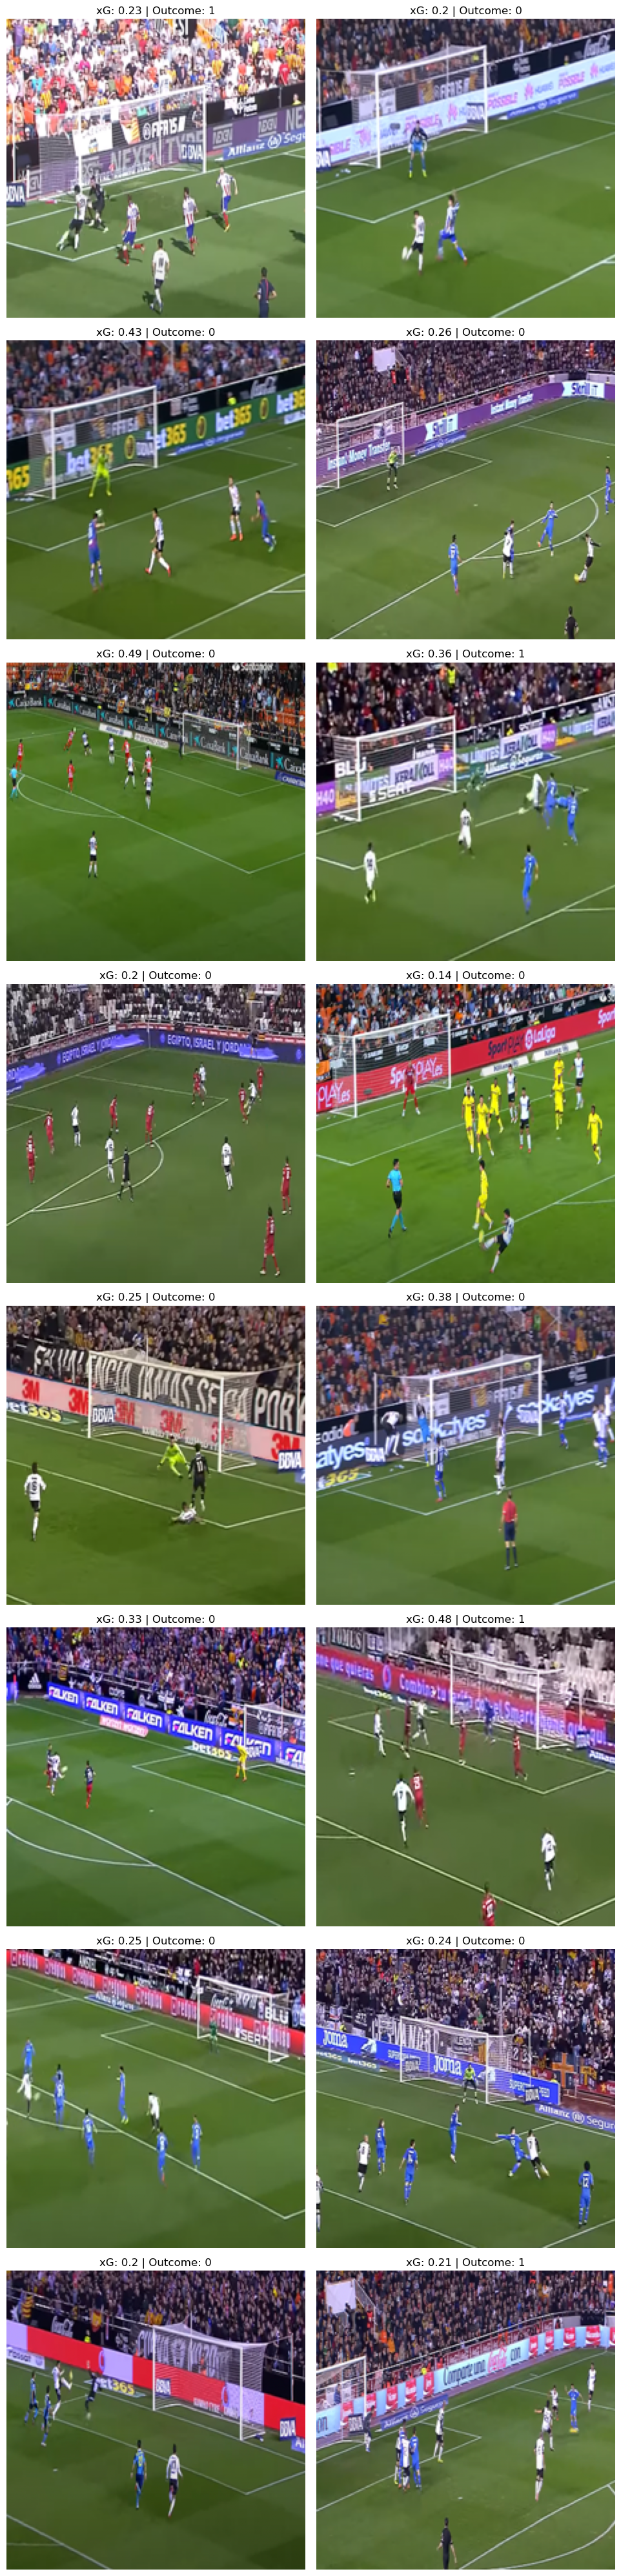

In [16]:
# Showing results for each test pic

num_images = y_test.shape[0]
num_rows = (num_images + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(X_image_test[i])
    axs[row, col].axis('off')
    axs[row, col].set_title(f"xG: {round(float(y_pred_prob[i][0]), 2)} | Outcome: {y_test[i]}")

for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Final remarks

**The results are not as great as with numeric data, it seems that the pictures confuse the model more than help it. Although, some interpretations are better than in the case of numeric model**